# (실습) 한눈에 보는 머신러닝

**문제 1**

[(구글코랩) 한눈에 보는 머신러닝](https://colab.research.google.com/github/codingalzi/handson-ml3/blob/master/notebooks/code_ml_landscape.ipynb)의 소스코드를 먼저 공부하세요.

**문제 2**

[아래 모양의 데이터프레임을 유도하는 과정이 보다 자세히 설명된 주피터 노트북](https://colab.research.google.com/github/codingalzi/handson-ml3/blob/master/notebooks/code_ml_landscape.ipynb)을 공부하세요.

<p><div align="center"><img src="https://github.com/codingalzi/handson-ml3/blob/master/jupyter-book/imgs/ch01/gdp-bli-2015.png?raw=true" style="width:300px;"></div></p>

**문제 3**

[(구글 코랩) 한눈에 보는 머신러닝](https://colab.research.google.com/github/codingalzi/handson-ml3/blob/master/notebooks/code_ml_landscape.ipynb)에서 사용된
OECD 삶의 만족도 데이터와 IMF 1인당 GDP 데이터를 2020년도 데이터로 업데이트 한 후에
선형회귀 모델을 훈련시킨다.

참고: 아래 링크의 내용을 참고하세요.

- [handson-ml3: The_machine_learning_landscape](https://github.com/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb)

In [800]:
import sys
assert sys.version_info >= (3, 7)

# 모듈: 넘파이와 판다스
import numpy as np
import pandas as pd

# 랜덤 시드 설정: 동일한 실행 결과 얻기
np.random.seed(42)

# 그래프 출력 설정
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

pd.set_option('display.max_columns', None)

In [801]:
df = pd.read_csv(r".\datasets\lifesat_full.csv")

In [802]:
df.sort_values(by="Country", inplace=True) # Country 오름차순 정렬
df = df.reset_index(drop=True) # 기존 index 제거
df.index = df.index + 1 # 새롭게 index 넘버링

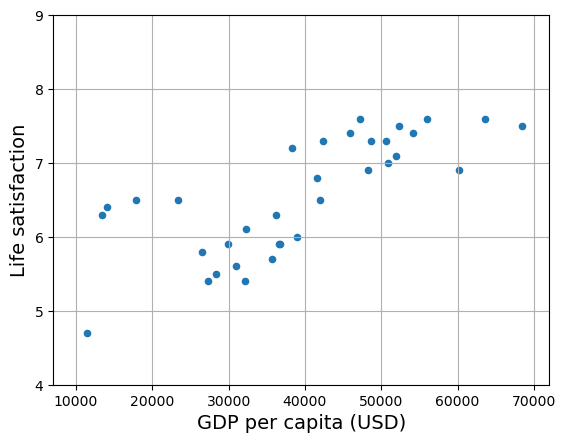

In [803]:
df.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([7_000, 72_000, 4, 9])
plt.show()

기울기 (slope): 5.580189601390202
절편 (intercept): 2.3340860575180277e-05


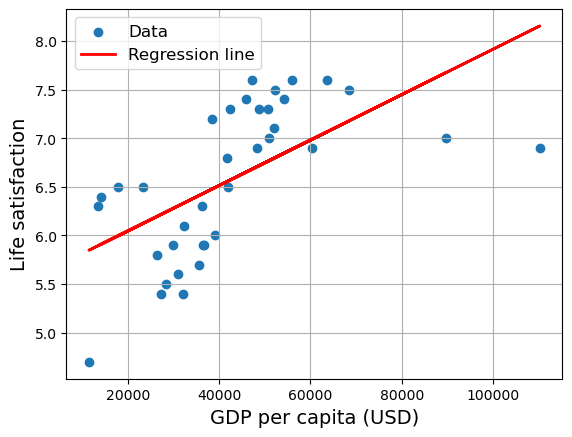

In [804]:
from sklearn.linear_model import LinearRegression

# 입력(X)과 타깃(y) 변수 지정
X = df[["GDP per capita (USD)"]]  # 독립 변수: GDP
y = df["Life satisfaction"]       # 종속 변수: Life satisfaction

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X, y)

t0, t1 = model.intercept_, model.coef_[0]

print("기울기 (slope):", t0)
print("절편 (intercept):", t1)

# 기본 산점도
plt.scatter(df["GDP per capita (USD)"], df["Life satisfaction"], label="Data")

# 직선 그리기
# X=np.linspace(0, 120_000)
plt.plot(X, t0 + t1*X, "r", linewidth=2, label="Regression line")

# 3. 축 설정 + 범례 추가
# plt.axis([0, 120_000, 4, 9])
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.grid(True)
plt.legend()
plt.show()

In [805]:
df.sort_values(by="GDP per capita (USD)", inplace=True) # Country 오름차순 정렬

In [806]:
q1 = df["GDP per capita (USD)"].quantile(0.25)
q3 = df["GDP per capita (USD)"].quantile(0.75)
iqr = q3 - q1

# IQR 기준 범위 바깥의 값 제거
df_filtered = df[(df["GDP per capita (USD)"] >= q1 - 1.5*iqr) & 
                 (df["GDP per capita (USD)"] <= q3 + 1.5*iqr)].copy()

df_filtered

,Country,GDP per capita (USD),Life satisfaction
30,South Africa,11466.189672,4.7
7,Colombia,13441.492952,6.3
4,Brazil,14063.982505,6.4
22,Mexico,17887.750736,6.5
6,Chile,23324.524751,6.5
28,Russia,26456.387938,5.8
13,Greece,27287.083401,5.4
34,Turkey,28384.987785,5.5
19,Latvia,29932.493910,5.9
14,Hungary,31007.768407,5.6


In [807]:
df_filtered.sort_values(by="Country", inplace=True)
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.index = df_filtered.index + 1
df_filtered

,Country,GDP per capita (USD),Life satisfaction
1,Australia,48697.837028,7.3
2,Austria,51935.603862,7.1
3,Belgium,48210.033111,6.9
4,Brazil,14063.982505,6.4
5,Canada,45856.625626,7.4
6,Chile,23324.524751,6.5
7,Colombia,13441.492952,6.3
8,Denmark,55938.212809,7.6
9,Estonia,35638.421351,5.7
10,Finland,47260.800458,7.6
